In [337]:
import numpy as np
import pandas as pd
import jieba
import jieba.analyse
import datetime
import random
from wordcloud import WordCloud
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

# 代码逻辑部分

In [299]:
data = pd.read_csv('out.csv')
data['time'] = data['time'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
data['date'] = data['time'].apply(lambda x: x.date())
data['hour'] = data['time'].apply(lambda x: x.hour)
data['year-month'] = data['time'].apply(lambda x:str(x.year) + '-' + str(x.month).zfill(2))
stop_words = []
with open('stop_words.txt') as f:
    for line in f.readlines():
        stop_words.append(line.strip())

In [182]:
#词云，前50个经常出现的词(有意义的词)
def wordCloud(person='all'):
    if person == 'all':
        content = ''
        for item in data['content']:
            content += (item+' ')
    elif person == 'jean':
        content = ''
        temp_data = data[data['name'] == 'Jean']
        for item in temp_data['content']:
            content += (item+' ')
    else:
        content = ''
        temp_data = data[data['name'] == 'Gordon']
        for item in temp_data['content']:
            content += (item+' ')        
    for word in stop_words:
        content = content.replace(word, '')
    tag_list = jieba.analyse.extract_tags(content, topK=50)
    wl = ",".join(tag_list)
    wc = WordCloud(background_color="white",mask=None,max_words=100,font_path='font.ttf',max_font_size=100,random_state=30,scale=2.5)
    myword = wc.generate(wl)
    plt.imshow(myword)
    plt.axis("off")

In [132]:
#聊天记录总数
totGordonNum = len(data[data['name'] == 'Gordon'])
totJeanNum = len(data[data['name'] == 'Jean'])
#回复平均长度
avgGordonMsg = data[data['name'] == 'Gordon']['len'].mean()
avgJeanMsg = data[data['name'] == 'Jean']['len'].mean()

In [125]:
def dayCount(person='all'):
    if person == 'all':
        #按日统计聊天记录总数
        dayChatNum = data['content'].groupby(data['date']).count()
        dayFrame = pd.DataFrame(pd.date_range('2013-05-17','2018-05-17').astype(str))
        dayFrame.columns = ['date']
        tempFrame = pd.DataFrame(dayChatNum).reset_index()
        tempFrame.columns = ['date', 'cnt']
        tempFrame['date'] = tempFrame['date'].astype(str)
        dayFrame = pd.merge(dayFrame, tempFrame, on='date',how='outer')
        dayFrame = dayFrame.fillna(0)
        return dayFrame
    elif person == 'jean':
        temp_data = data[data['name'] == 'Jean'].copy()
        dayChatNum = temp_data['content'].groupby(temp_data['date']).count()
        dayFrame = pd.DataFrame(pd.date_range('2013-05-17','2018-05-17').astype(str))
        dayFrame.columns = ['date']
        tempFrame = pd.DataFrame(dayChatNum).reset_index()
        tempFrame.columns = ['date', 'cnt']
        tempFrame['date'] = tempFrame['date'].astype(str)
        dayFrame = pd.merge(dayFrame, tempFrame, on='date',how='outer')
        dayFrame = dayFrame.fillna(0)
        return dayFrame   
    elif person=='gordon':
        temp_data = data[data['name'] == 'Gordon'].copy()
        dayChatNum = temp_data['content'].groupby(temp_data['date']).count()
        dayFrame = pd.DataFrame(pd.date_range('2013-05-17','2018-05-17').astype(str))
        dayFrame.columns = ['date']
        tempFrame = pd.DataFrame(dayChatNum).reset_index()
        tempFrame.columns = ['date', 'cnt']
        tempFrame['date'] = tempFrame['date'].astype(str)
        dayFrame = pd.merge(dayFrame, tempFrame, on='date',how='outer')
        dayFrame = dayFrame.fillna(0)
        return dayFrame 
    else:
        print('error')
        return 0

In [126]:
def monCount(person='all'):
    if person == 'all':
        #按月统计聊天记录总数
        monChatNum = data['content'].groupby(data['year-month']).count()
        monFrame = pd.DataFrame([x[:7] for x in list(pd.date_range('2013-05','2018-05').astype(str))]).drop_duplicates()
        monFrame.columns = ['month']
        tempFrame = pd.DataFrame(monChatNum).reset_index()
        tempFrame.columns = ['month', 'cnt']
        tempFrame['month'] = tempFrame['month'].astype(str)
        monFrame = pd.merge(monFrame, tempFrame, on='month',how='outer')
        monFrame = monFrame.fillna(0)
        return monFrame
    elif person == 'jean':
        #按月统计聊天记录总数
        temp_data = data[data['name'] == 'Jean'].copy()
        monChatNum = temp_data['content'].groupby(temp_data['year-month']).count()
        monFrame = pd.DataFrame([x[:7] for x in list(pd.date_range('2013-05','2018-05').astype(str))]).drop_duplicates()
        monFrame.columns = ['month']
        tempFrame = pd.DataFrame(monChatNum).reset_index()
        tempFrame.columns = ['month', 'cnt']
        tempFrame['month'] = tempFrame['month'].astype(str)
        monFrame = pd.merge(monFrame, tempFrame, on='month',how='outer')
        monFrame = monFrame.fillna(0)
        return monFrame        
    elif person == 'gordon':
        #按月统计聊天记录总数
        temp_data = data[data['name'] == 'Gordon'].copy()
        monChatNum = temp_data['content'].groupby(temp_data['year-month']).count()
        monFrame = pd.DataFrame([x[:7] for x in list(pd.date_range('2013-05','2018-05').astype(str))]).drop_duplicates()
        monFrame.columns = ['month']
        tempFrame = pd.DataFrame(monChatNum).reset_index()
        tempFrame.columns = ['month', 'cnt']
        tempFrame['month'] = tempFrame['month'].astype(str)
        monFrame = pd.merge(monFrame, tempFrame, on='month',how='outer')
        monFrame = monFrame.fillna(0)
        return monFrame        

In [265]:
#发起聊天人统计
createChat = data.drop_duplicates('date').copy()
createChat['flag'] = createChat['name']=='Gordon'
cjeanY = createChat[createChat['flag'] == False].groupby('year-month').count()['flag']
cgordonY = createChat[createChat['flag'] == True].groupby('year-month').count()['flag']

In [266]:
#结束聊天人统计
endChat = data.drop_duplicates('date',keep='last').copy()
endChat['flag'] = endChat['name']=='Gordon'
ejeanY = endChat[endChat['flag'] == False].groupby('year-month').count()['flag']
egordonY = endChat[endChat['flag'] == True].groupby('year-month').count()['flag']

In [181]:
#聊天主题
def subjectWordCloud(person='jean', method='create'):
    if method == 'create':
        temp_data = data.drop_duplicates('date',keep='first').copy()
    else:
        temp_data = data.drop_duplicates('date',keep='last').copy()
    if person == 'jean':
        content = ''
        temp_data = temp_data[temp_data['name'] == 'Jean']
        for item in temp_data['content']:
            content += (item+' ')
    else:
        content = ''
        temp_data = temp_data[temp_data['name'] == 'Gordon']
        for item in temp_data['content']:
            content += (item+' ')      
    for word in stop_words:
        content = content.replace(word, '')
    tag_list = jieba.analyse.extract_tags(content, topK=50)
    wl = ",".join(tag_list)
    wc = WordCloud(background_color="white",mask=None,max_words=100,font_path='font.ttf',max_font_size=100,random_state=30,scale=2.5)
    myword = wc.generate(wl)
    plt.imshow(myword)
    plt.axis("off")

# 统计分析报告

## 聊天总词频

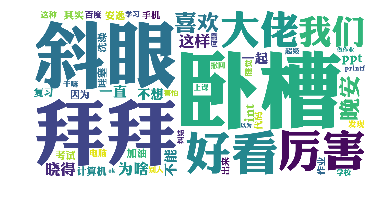

In [183]:
wordCloud()

## Jean的总词频

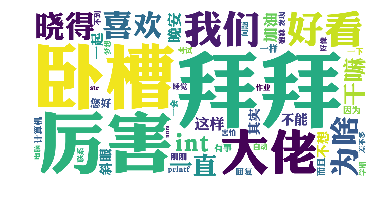

In [184]:
wordCloud('jean')

## Gordon的总词频

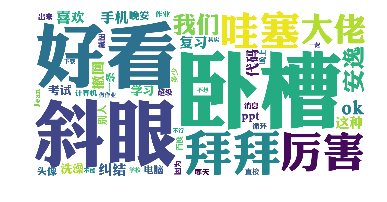

In [185]:
wordCloud('gordon')

## 聊天记录总数，回复平均长度

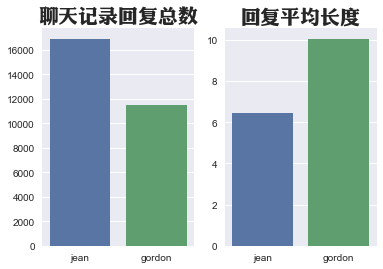

In [201]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"font.ttf", size=20)
fig = plt.figure(figsize=(6,4))
ax1 = fig.add_subplot(121)
ax2= fig.add_subplot(122)
ax1.set_title('聊天记录回复总数',fontproperties=font)
ax2.set_title('回复平均长度',fontproperties=font)
sns.set(style="darkgrid")
sns.barplot(x=['jean','gordon'],y=[totJeanNum, totGordonNum],ax=ax1)
sns.barplot(x=['jean','gordon'],y=[avgJeanMsg, avgGordonMsg],ax=ax2)

## 日聊天记录变化情况

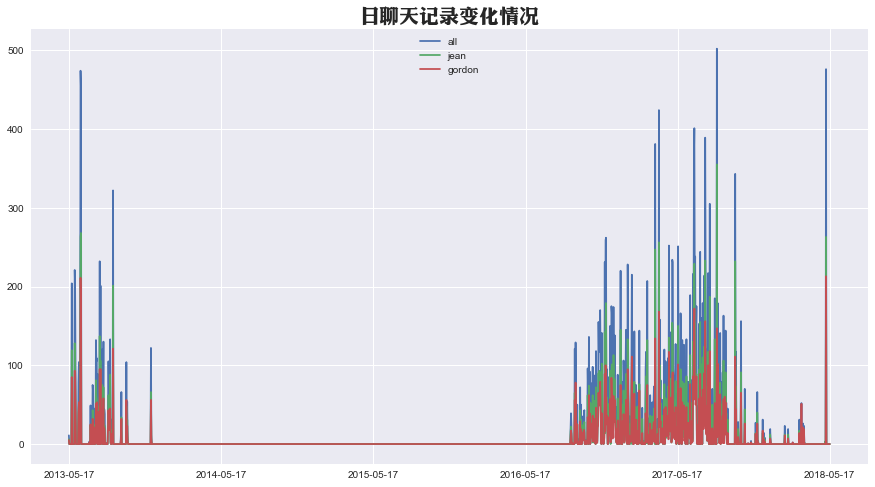

In [240]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"font.ttf", size=20)
day_all = dayCount('all')
day_jean = dayCount('jean')
day_gordon = dayCount('gordon')
fig, ax = plt.subplots(1,1,figsize=(15,8))
ax.plot(day_all['date'],day_all['cnt'],label='all')
ax.plot(day_all['date'],day_jean['cnt'],label='jean')
ax.plot(day_all['date'],day_gordon['cnt'],label='gordon')
ax.set_xticks(['2013-05-17','2014-05-17', '2015-05-17', '2016-05-17', '2017-05-17','2018-05-17'])
ax.set_title('日聊天记录变化情况',fontproperties=font)
ax.legend(loc='best')

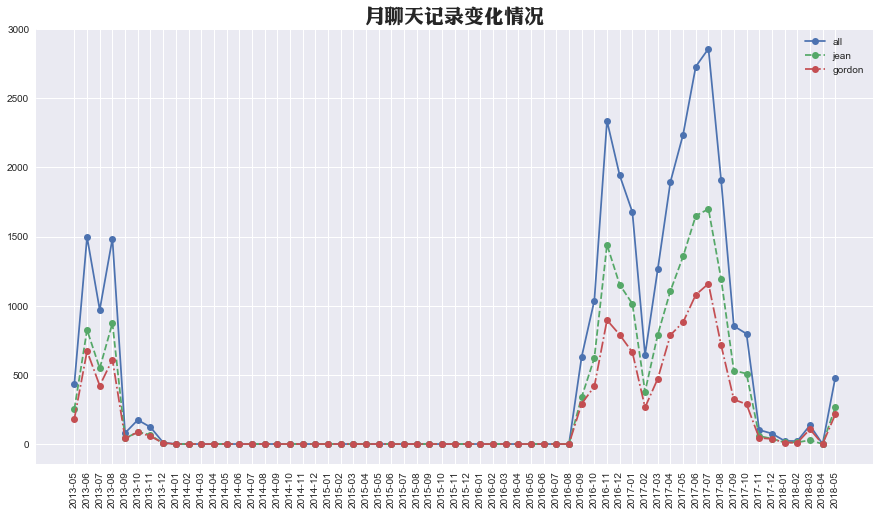

In [258]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"font.ttf", size=20)
mon_all = monCount('all')
mon_jean = monCount('jean')
mon_gordon = monCount('gordon')
fig, ax = plt.subplots(1,1,figsize=(15,8))
ax.plot(mon_all['month'],mon_all['cnt'],label='all',marker='o')
ax.plot(mon_all['month'],mon_jean['cnt'],label='jean',marker='o',linestyle='--')
ax.plot(mon_all['month'],mon_gordon['cnt'],label='gordon',marker='o',linestyle='-.')
ax.set_title('月聊天记录变化情况',fontproperties=font)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.legend(loc='best')

## 聊天发起/结束人(按月统计)

* 统计有聊天记录的月份，发起人是jean/gordon的聊天的总次数
* 统计有聊天记录的月份，终结聊天的是jean/gordon的总次数

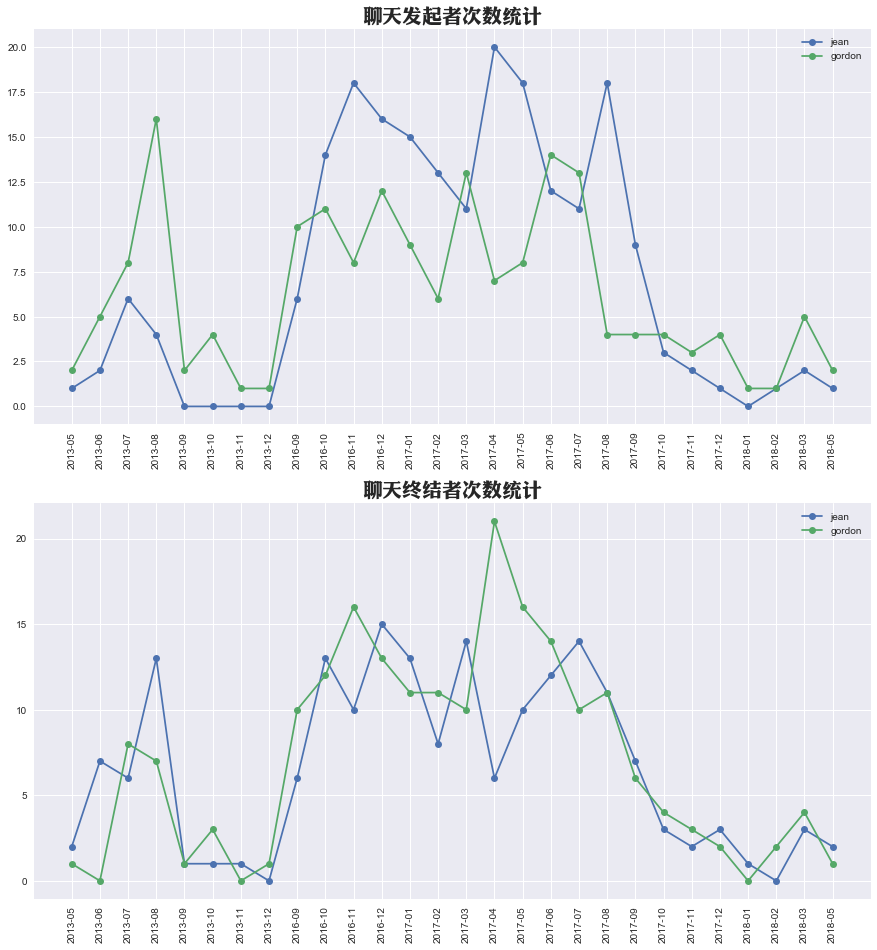

In [297]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"font.ttf", size=20)
fig = plt.figure(figsize=(15,16))
ax1 = fig.add_subplot(211)
ax2= fig.add_subplot(212)
ax1.set_title('聊天发起者次数统计',fontproperties=font)
ax2.set_title('聊天终结者次数统计',fontproperties=font)
t1= pd.DataFrame(cjeanY).reset_index()
t2=pd.DataFrame(cgordonY).reset_index()
t3=pd.merge(t1,t2,how='outer',on='year-month').fillna(0).sort_values(by='year-month')
ax1.plot(t3['year-month'],t3['flag_x'],label='jean',marker='o')
ax1.plot(t3['year-month'],t3['flag_y'],label='gordon',marker='o')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax1.legend(loc='best')
t4= pd.DataFrame(ejeanY).reset_index()
t5=pd.DataFrame(egordonY).reset_index()
t6=pd.merge(t4,t5,how='outer',on='year-month').fillna(0).sort_values(by='year-month')
ax2.plot(t6['year-month'],t6['flag_x'],label='jean',marker='o')
ax2.plot(t6['year-month'],t6['flag_y'],label='gordon',marker='o')
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax2.legend(loc='best')

## Jean发起聊天时，常首先谈论的主题

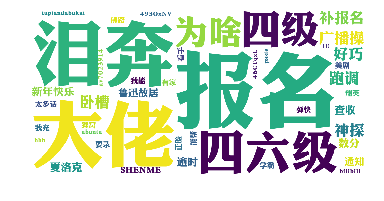

In [289]:
subjectWordCloud('jean','create')

## Gordon发起聊天时，常首先谈论的主题

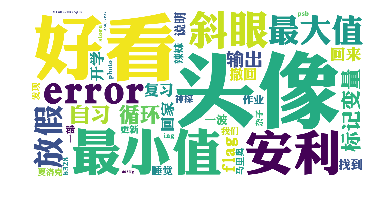

In [290]:
subjectWordCloud('gordon','create')

## Jean结束聊天时，常说的结束语

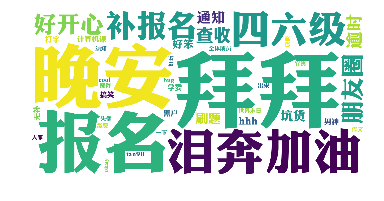

In [291]:
subjectWordCloud('jean','end')

## Gordon结束聊天时，常说的结束语

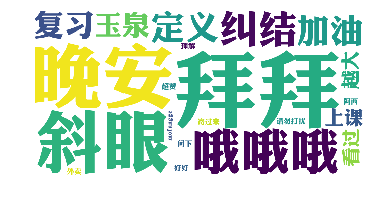

In [292]:
subjectWordCloud('gordon','end')

# 朴素贝叶斯预测

In [301]:
def func(a):
    if a == 'Gordon':
        return 1;
    else:
        return 0
data['label'] = data.name.map(func)

In [354]:
def createVocabList(dataSet):
    vocabSet = set()
    for document in dataSet:
        vocabSet = vocabSet | set(document)
    return list(vocabSet)

In [355]:
def bagOfwords2MN(vocabList, inputSet):
    returnVec = [0]*len(vocabList)
    for word in inputSet:
        if word in vocabList:
            returnVec[vocabList.index(word)] += 1
    return returnVec

In [356]:
def divSet(vocablist, dataSet, classVec):
    trainingSet = range(len(dataSet)); testSet=[]
    for i in range(int(len(dataSet)*0.3)):
        randIndex = int(random.uniform(0,len(trainingSet)))
        testSet.append(trainingSet[randIndex])
        del(list(trainingSet)[randIndex])  
    trainMat=[]; trainClasses = []
    for docIndex in trainingSet:
        trainMat.append(bagOfwords2MN(vocabList, dataSet[docIndex]))
        trainClasses.append(classVec[docIndex])
    return trainMat,trainClasses,testSet

In [357]:
def trainNB1(trainMatrix,trainCategory):
    numTrainDocs = len(trainMatrix)
    numWords = len(trainMatrix[0])
    pAbusive = sum(trainCategory)/float(numTrainDocs) #p(辱骂的=1)的概率

    p0Num = np.ones(numWords);p1Num = np.ones(numWords) #n列
    p0Denom = 2.0; p1Denom = 2.0 #分母
    for i in range(numTrainDocs):
        if trainCategory[i] == 1:
            p1Num += trainMatrix[i] #n列同时计数
            p1Denom += sum(trainMatrix[i]) ##标量 分母是该类的总词条数目
        else:
            p0Num += trainMatrix[i]
            p0Denom += sum(trainMatrix[i])
    p1Vect = np.log(p1Num/p1Denom)
    p0Vect = np.log(p0Num/p0Denom)
    return p0Vect,p1Vect,pAbusive

In [358]:
def classifyNB(vec2Classify, p0Vec, p1Vec, pClass1):
    p1 =sum(vec2Classify*p1Vec) + np.log(pClass1) #转为log后*全部为+
    p0 =sum(vec2Classify*p0Vec) + np.log(1 - pClass1)
    if p1>p0:
        return 1
    else:
        return 0

In [359]:
def prefunc(string):
    testWords = string
    testEntry = " ".join(jieba.cut(testWords)).split()
    thisDoc = np.array(bagOfwords2MN(vocabList,testEntry))
    predict = classifyNB(thisDoc,p0V,p1V,pAb)
    if predict==0:
        print ("这句话是Jean说的")
    else:
        print("这句话是Gordon说的")

In [360]:
def test(testSet,vocabList, dataSet, classVec, p0V,p1V,pAb):
    errorCount = 0
    for docIndex in testSet:
        wordVector = bagOfwords2MN(vocabList, dataSet[docIndex])
        if classifyNB(np.array(wordVector),p0V,p1V,pAb) != classVec[docIndex]:
            errorCount += 1
            print ("classification error",dataSet[docIndex])
    print ('the error rate is: ',float(errorCount)/len(testSet))

In [361]:
dataSet = []
for i in data.index:
    dataSet.append(" ".join(jieba.cut(data.content[i])).split())
classVec = data.label.tolist()
vocabList = createVocabList(dataSet)
trainMat,trainClasses,testSet = divSet(vocabList,dataSet,classVec)
p0V,p1V,pAb = trainNB1(trainMat,trainClasses)

In [362]:
test(testSet,vocabList, dataSet, classVec, p0V,p1V,pAb)

classification error ['是', '啊']
classification error ['都', '要', '看', '完', '了', '吧']
classification error ['哈哈哈哈', '哈哈哈哈']
classification error ['我', '以为', '是', '人', '都', '会', '痛', '的']
classification error ['丑']
classification error ['…', '…']
classification error ['[', '表情', ']', '[', '表情', ']']
classification error ['为什么', '你', '都', '喜欢', '坐', '着', '拍']
classification error []
classification error ['好', '的']
classification error ['…', '…']
classification error ['我们', '班', '好多', '人', '化学', '不及格', '…', '…']
classification error ['其实', '吧']
classification error ['我', '是', '觉得', '我', '自己', '没有', '怎么', '跟', '父母', '交流', '过', '，', '相反', '我', '姐姐', '就', '经常']
classification error ['[', '图片', ']']
classification error []
classification error ['哈哈哈哈', '哈哈哈', '哈哈哈']
classification error ['哈哈', '我', '吃', '过', '一次', '感觉', '没', '啥子', '区别']
classification error ['只不过', '以前', '撤回', '了']
classification error ['淘宝']
classification error ['就']
classification error ['[', '图片', ']']
classification error 

classification error ['化学']
classification error ['厉害']
classification error ['[', '图片', ']', '[', '图片', ']']
classification error ['发', '你', '了']
classification error ['[', '图片', ']']
classification error []
classification error ['啥子']
classification error ['[', '图片', ']']
classification error ['一排', '都', '是']
classification error ['昨天', '下雨', '没', '？']
classification error ['你', '跟', '你', '爸爸', '说', '啊']
classification error ['你', '多少']
classification error ['[', '图片', ']']
classification error ['1']
classification error ['.', 'exe', '是', '安装包']
classification error ['7', '1']
classification error ['又', '不', '说', '咋子', '做']
classification error ['好', '了']
classification error ['了']
classification error ['[', '图片', ']']
classification error ['可以', '带', '手机', '？']
classification error []
classification error ['[', '图片', ']']
classification error ['你们', '给', '他录', '…']
classification error ['？', '？', '？', '？', '？', '？', '？', '？']
classification error ['嗯']
classification error ['…', '…'

classification error ['就', '懒得', '吃', '了']
classification error ['5', '号']
classification error ['他', '认识', '曾畅', '？']
classification error ['快点', '哦']
classification error ['托福', '呢']
classification error ['哦', '哦']
classification error ['对', '啊']
classification error ['你', '为啥', '锁', '空间', '啊']
classification error ['不得了', '不得了', '还会', '分类', '了']
classification error []
classification error ['赶紧', '报名', '志愿者']
classification error ['哈哈哈']
classification error ['赶紧', '滚']
classification error ['[', '图片', ']']
classification error ['你', '也', '是', '傻', '吧']
classification error ['[', '图片', ']']
classification error ['那', '我', '打击', '你好', '了']
classification error ['太好了']
classification error ['游戏', '真的', '这么', '好玩', '？']
classification error ['好好看']
classification error ['傻']
classification error ['祝', '你', '永远']
classification error ['睡', '吧', '睡', '吧']
classification error ['你们', '学校', '多少']
classification error ['帮', '我']
classification error ['第一个']
classification error ['话', '说', '

classification error ['是', '的']
classification error ['那', '你', '做', '吧']
classification error ['[', '图片', ']']
classification error ['你', '穿', '啥子', '都', '可爱', '啊', '，', '不是', '幼稚', '啊']
classification error ['。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。']
classification error ['哈哈', '感觉', '会', '很', '好玩']
classification error ['喝酒', '】']
classification error ['你', '啊']
classification error ['你', '室友', '知道', '你', '这样', '把', '他', '的', '照片', '外露', '吗']
classification error ['[', '图片', ']']
classification error ['我', '现在', '下课', '了']
classification error ['[', '图片', ']']
classification error ['太萌']
classification error ['[', '不是', '吧', ']']
classification error ['太萌']
classification error ['[', '图片', ']']
classificat

classification error ['整篇', '看', '过来', '我', '就', '只', '看到', '挑战杯', '三个', '字']
classification error ['[', '图片', ']']
classification error ['[', '图片', ']']
classification error ['刷']
classification error ['[', '表情', ']']
classification error ['于']
classification error ['肯定', '啊']
classification error ['从', '江苏', '过来', '的']
classification error ['卧槽']
classification error ['他们', '要', '吃', '吗']
classification error ['scanf']
classification error ['…']
classification error ['安']
classification error ['什么', '挂', '了', '？']
classification error ['厉害', '了', '我', '的', '儿子', '一天', '280', '多']
classification error ['真的', '？']
classification error ['图片', '转', '字符']
classification error ['啥', '视频', '呀']
classification error ['我']
classification error ['嗯']
classification error ['我', '其实', '也', '不', '知道', '为', '啥子', '我', '又', '不想', '去', '了']
classification error ['咋子', '了', '哦']
classification error ['是', '吗', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。']
classification error ['不会', '就', '只'

classification error ['[', '图片', ']']
classification error ['http', ':', '/', '/', 'www', '.', 'bilibili', '.', 'com', '/', 'av5218077']
classification error []
classification error ['我', '跟', '你', '讲', '哦']
classification error ['[', '图片', ']']
classification error ['高中', '的', '人', '几乎', '看不见', '电子产品', '了']
classification error ['明明', '大妈', '妆']
classification error ['qq']
classification error ['肯定', '摔', '惨', '了']
classification error ['额', '，']
classification error ['为', '啥子', '觉得', '很', '过分', '呢']
classification error ['好', '吧', '好', '吧']
classification error ['去掉', '了', '四级', '了', '只有', '1700', '多']
classification error ['我', '以为', '你', '自己', '想', '出来', '的']
classification error ['还', '真', '不', '对']
classification error ['我', '觉得', '我要', '能', '再帅', '一点点']
classification error ['[', '图片', ']']
classification error ['可以', '的', '还是', '厉害']
classification error ['有', '有', '有', '好好', '好', '你', '继续']
classification error ['你', '现在', '在', '跟', '他', '补课', '呀']
classification error ['？']
c

classification error ['[', '表情', ']', '[', '表情', ']']
classification error ['哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '哈哈哈', '，', '我', '终于', '调出', '波形', '了']
classification error ['我', '也', '是', '哦', '哦', '的', '反应', '当时', '赶紧', '结束', '了', '话题']
classification error ['所以', '说', '一个', '好', '的', '代码', '风格']
classification error ['傻', '逼']
classification error ['你', '到', '重庆', '的', '？']
classification error ['难度', '问题', '吧']
classification error ['你', '为啥', '锁', '空间', '啊']
classification error ['然后', '呢']
classification error ['[', '表情', ']']
classification error ['[', '图片', ']']
classification error ['了']
classification error ['你', '再', '试试']
classification error ['您好', '，', '我', '现在', '有事', '不', '在', '，', '一会', '再', '和', '您', '联系', '。']
classification error ['那本书', '你', '就', '看', '完', '啦']
classification error ['真是', '可怕']
classification error ['我', '记成', '昨天', '一样', '的', '考试', '时间', '了']
classification error ['[', '图片', ']']
classi

classification error ['你', '要', '写', '检讨']
classification error []
classification error ['三个', '地方', '不同']
classification error ['[', '图片', ']']
classification error ['[', '图片', ']']
classification error ['你', '也', '会', '很', '可怕', '的']
classification error ['你', '多久', '走']
classification error ['[', '图片', ']', '所以', '你', '打算', '买', '粉色', '吗']
classification error ['你', '大概', '好久', '买票', '回', '上海', '呢']
classification error ['好']
classification error ['今天', '不', '适合', '跑步']
classification error ['事实证明']
classification error ['我', '继续', '写', '代码', '了']
classification error ['哈哈哈', '因为', '要', '体现', '我', '是', '猜', '的', '不是', '查', '的']
classification error ['懂', '了', '吧']
classification error ['二']
classification error ['接']
classification error ['[', '图片', ']']
classification error ['大部分', '男生']
classification error ['[', '图片', ']', 'what']
classification error ['嗯', '呢']
classification error []
classification error ['哇', '哦']
classification error ['你', '考完', '了', '？']
classification error

classification error ['不约个', '饭', '什么', '的', '吗']
classification error ['/', '斜眼', '笑', '/', '斜眼', '笑']
classification error ['我会', '跟', '你', '讲', '我', '完全', '不会', '吗']
classification error ['我', '说']
classification error ['读书', '了']
classification error ['上车', '不', '看车', '型号', '吗', '233']
classification error ['我', '知道', '啥子', '？']
classification error ['唉']
classification error ['[', '图片', ']']
classification error ['你', '跟', '我', '讲', '过']
classification error ['你', '肠子', '一直', '有', '问题', '没', '检查', '过', '吗']
classification error ['笑', '死', '我', '了']
classification error ['我', '的', '天', '厉害', '了', '额']
classification error ['给']
classification error []
classification error ['[', '图片', ']']
classification error ['我', '说']
classification error ['。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。', '。',

classification error ['[', '表情', ']', '[', '表情', ']']
classification error ['对', '啊']
classification error ['准备']
classification error ['嗯', '，', '来', '的话', '给', '我', '打个', '电话']
classification error ['从', '0']
classification error ['[', '图片', ']']
classification error ['不想', '动']
classification error ['还是', '打电话']
classification error ['怎么', '不去', '买']
classification error ['其实', '我', '老汉', '是', '下去', '弄', '保险', '的', '事', '，', '顺便', '送', '我']
classification error ['[', '图片', ']']
classification error ['我', '不会', '说', '我', '已经', '单曲', '循环', '很久', '了']
classification error ['对']
classification error ['1', '块', '？']
classification error ['啥子', '意思']
classification error ['不', '解压']
classification error ['[', '图片', ']', '我', '是', '你', '20', '级', '的', '小号']
classification error []
classification error ['拜']
classification error ['哎']
classification error ['你', '找到', '了']
classification error ['后面', '我', '就', '习惯', '了', '，', '因为', '我', '发现', '她', '真的', '很', '弱']
classification error ['不想', 

classification error ['[', '图片', ']']
classification error ['不得了']
classification error ['[', '图片', ']']
classification error ['啥子']
classification error ['这么', '快']
classification error ['[', '图片', ']']
classification error ['抱', '学长', '大腿', '啊', '！']
classification error ['你', '说', '我', '代码', '丑', '？', '？']
classification error ['来', '吧']
classification error ['[', '表情', ']', '[', '表情', ']']
classification error ['为', '啥子']
classification error ['明天', '有', '时间', '才能', '搞']
classification error ['[', '图片', ']']
classification error ['嗯']
classification error ['就是']
classification error ['一直', '循环']
classification error ['呵呵']
classification error ['[', '表情', ']', '[', '表情', ']', '[', '表情', ']']
classification error ['[', '图片', ']']
classification error ['嗯']
classification error []
classification error ['哈哈哈哈', '哈哈哈']
classification error ['我', '靠']
classification error ['感觉', '以前', '有些', '环境', '确实', '不好', '吧', '走', '出去', '了', '才能', '看清楚']
classification error ['你', '咋', '不', '去', '打'

In [367]:
prefunc('卧槽')

这句话是Gordon说的


In [368]:
prefunc('大佬')

这句话是Jean说的


In [370]:
prefunc('学习')

这句话是Gordon说的


In [371]:
prefunc('晚安')

这句话是Jean说的


In [372]:
prefunc('拜拜')

这句话是Jean说的


In [374]:
prefunc('GPA')

这句话是Gordon说的


In [375]:
prefunc('竞赛')

这句话是Gordon说的


In [376]:
prefunc('男神')

这句话是Jean说的


# 总结

> 把诗意的理性献给你